# Getting Started

## Installation

Install the latest version of kerrgeopy using pip

```bash
pip install kerrgeopy
```
(stable-orbits)=
## Stable Bound Orbits

Kerrgeopy computes orbits in Boyer-Lindquist coordinates $(t,r,\theta,\phi)$. Let $M$ to represent the mass of the primary body and let $J$ represent its angular momentum. Working in geometrized units where $G=c=1$, stable bound orbits are parametrized using the following variables:

$a$ - spin of the primary body 
<br>
$p$ - orbital semilatus rectum
<br>
$e$ - orbital eccentricity
<br>
$x$ - cosine of the orbital inclination

\begin{equation}
a = \frac{J}{M^2}, \quad\quad p = \frac{2r_{\text{min}}r_{\text{max}}}{M(r_{\text{min}}+r_{\text{max}})}, \quad\quad e = \frac{r_{\text{max}}-r_{\text{min}}}{r_{\text{max}}+r_{\text{min}}}, \quad\quad x = \cos{\theta_{\text{inc}}}
\end{equation}

Note that $a$ and $x$ are restricted to values between -1 and 1, while $e$ is restricted to values between 0 and 1. Retrograde orbits are represented using a negative value for $a$ or for $x$. Polar orbits, marginally bound orbits, and orbits around an extreme Kerr black hole are not supported. 

First, construct a [`StableOrbit`](stable.StableOrbit) using the four parameters described above.

In [1]:
import kerrgeopy as kg
from math import cos, pi

orbit = kg.StableOrbit(0.999,3,0.4,cos(pi/6))

Plot the orbit from $\lambda = 0$ to $\lambda = 10$ using the [`plot()`](stable.StableOrbit.plot) method

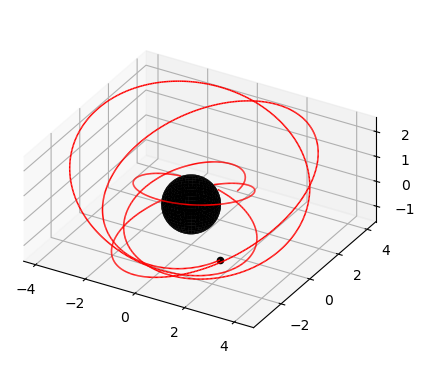

In [2]:
fig, ax = orbit.plot(0,10)

Next, compute the time, radial, polar and azimuthal components of the trajectory as a function of Mino time using the [`trajectory()`](stable.StableOrbit.trajectory) method. By default, the time and radial components of the trajectory are given in geometrized units and are normalized using $M$ so that they are dimensionless.

In [3]:
t, r, theta, phi = orbit.trajectory()

Text(0, 0.5, '$\\phi(\\lambda)$')

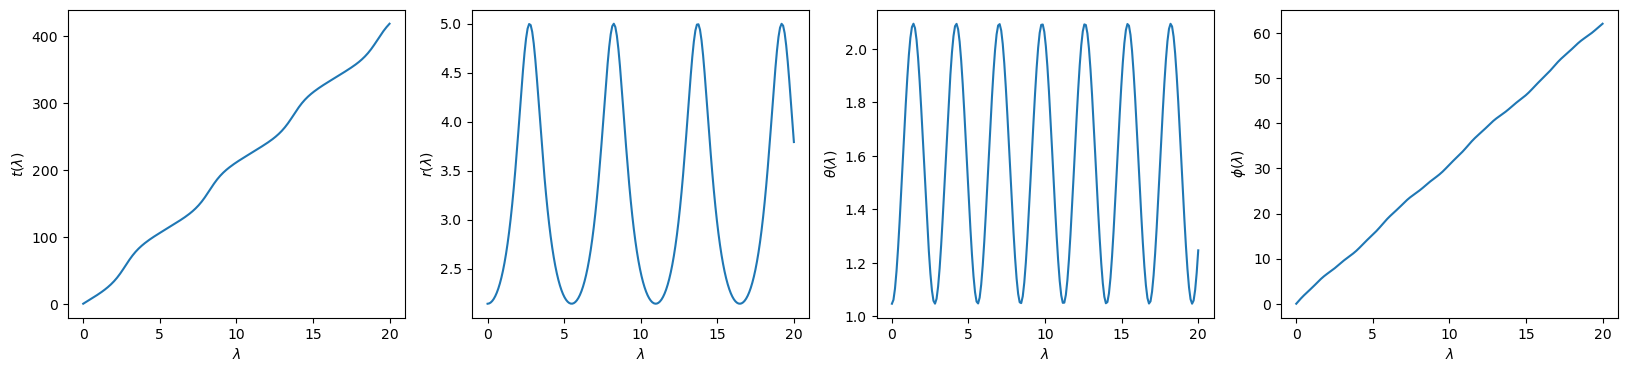

In [4]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

(orbital-properties)=
## Orbital Properties

Use the [`constants_of_motion()`](stable.StableOrbit.constants_of_motion) method to compute the dimensionless energy, angular momentum and Carter constant. By default, constants of motion are given in geometrized units where $G=c=1$ and are scale-invariant, meaning that they are normalized according to the masses of the two bodies as follows:

\begin{equation}
\mathcal{E} = \frac{E}{\mu}, \quad \mathcal{L} = \frac{L}{\mu M}, \quad \mathcal{Q} = \frac{Q}{\mu^2 M^2}
\end{equation}

Here, $M$ is the mass of the primary body and $\mu$ is the mass of the secondary body. 

Frequencies of motion can be computed in Mino time using the [`mino_frequencies()`](stable.StableOrbit.mino_frequencies) method and in Boyer-Lindquist time using the [`fundamental_frequencies()`](stable.StableOrbit.fundamental_frequencies) method. As with constants of motion, the frequencies returned by both methods are given in geometrized units and are normalized by $M$ so that they are dimensionless.

In [5]:
from IPython.display import display, Math

E, L, Q = orbit.constants_of_motion()

upsilon_r, upsilon_theta, upsilon_phi, gamma = orbit.mino_frequencies()

omega_r, omega_theta, omega_phi = orbit.fundamental_frequencies()


display(Math(fr"a = {orbit.a} \quad p = {orbit.p} \quad e = {orbit.e} \quad x = {orbit.x}"))

display(Math(fr"\mathcal{{E}} = {E:.3f} \quad \mathcal{{L}} = {L:.3f} \quad \mathcal{{Q}} = {Q:.3f}"))

display(Math(fr"""\Upsilon_r = {upsilon_r:.3f} \quad 
             \Upsilon_\theta = {upsilon_theta:.3f} \quad 
             \Upsilon_\phi = {upsilon_phi:.3f} \quad 
             \Gamma = {gamma:.3f}"""))

display(Math(fr"""\Omega_r = {omega_r:.3f} \quad
            \Omega_\theta = {omega_theta:.3f} \quad
            \Omega_\phi = {omega_phi:.3f}"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(plunging-orbits)=
## Plunging Orbits

Plunging orbits are parametrized using the spin parameter and the three constants of motion. 

$a$ - spin of the primary body
<br>
$\mathcal{E}$ - Energy
<br>
$\mathcal{L}$ - $z$-component of angular momentum
<br>
$\mathcal{Q}$ - Carter constant
<br>

It is assumed that all orbital parameters are given in geometrized units where $G=c=1$ and are normalized according to the masses of the two bodies as follows:

\begin{equation}
a = \frac{J}{M^2}, \quad \mathcal{E} = \frac{E}{\mu}, \quad \mathcal{L} = \frac{L}{\mu M}, \quad \mathcal{Q} = \frac{Q}{\mu^2 M^2}
\end{equation}

Construct a [`PlungingOrbit`](plunge.PlungingOrbit) by passing in these four parameters.

In [7]:
orbit = kg.PlungingOrbit(0.9, 0.94, 0.1, 12)

As with stable orbits, the components of the trajectory can be computed using the [`trajectory()`](plunge.PlungingOrbit.trajectory) method

In [8]:
t, r, theta, phi = orbit.trajectory()

Text(0, 0.5, '$\\phi(\\lambda)$')

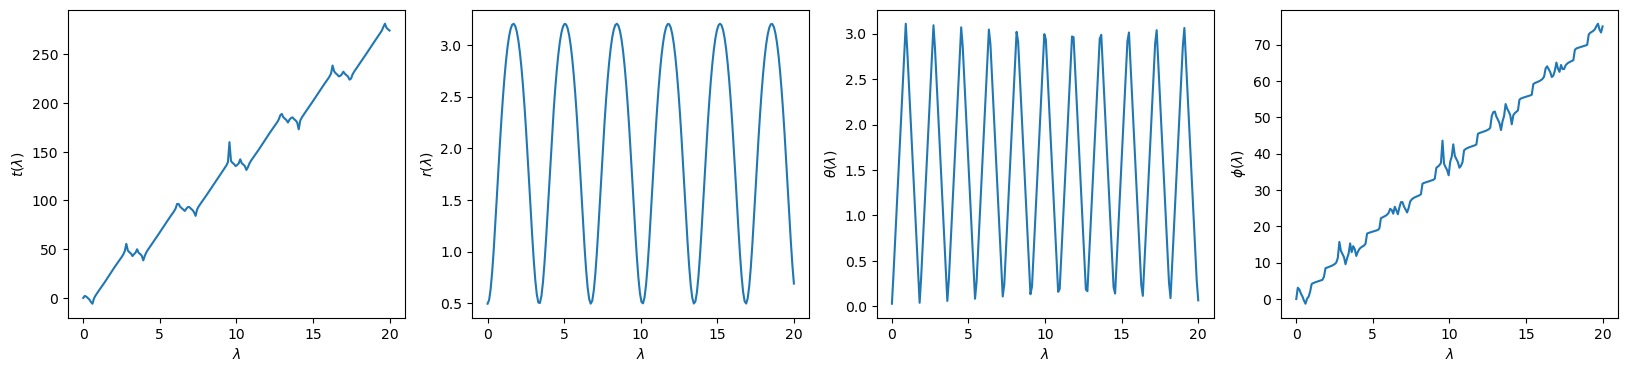

In [9]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

## Alternative Parametrizations

Use the [`from_constants()`](stable.StableOrbit.from_constants) class method to construct a [`StableOrbit`](stable.StableOrbit) from the spin parameter and constants of motion $(a,E,L,Q)$

In [9]:
orbit = kg.StableOrbit.from_constants(0.9, 0.95, 1.6, 8)

Use the [`Orbit`](orbit.Orbit) class to construct an orbit from the spin parameter $a$, initial position $(t_0,r_0,\theta_0,\phi_0)$ and initial four-velocity $(u^t_0,u^r_0,u^{\theta}_0,u^{\phi}_0)$

In [12]:
stable_orbit = kg.StableOrbit(0.999,3,0.4,cos(pi/6))

x0 = stable_orbit.initial_position
u0 = stable_orbit.initial_velocity

orbit = kg.Orbit(0.999,x0,u0)

Text(0, 0.5, '$\\phi(\\lambda)$')

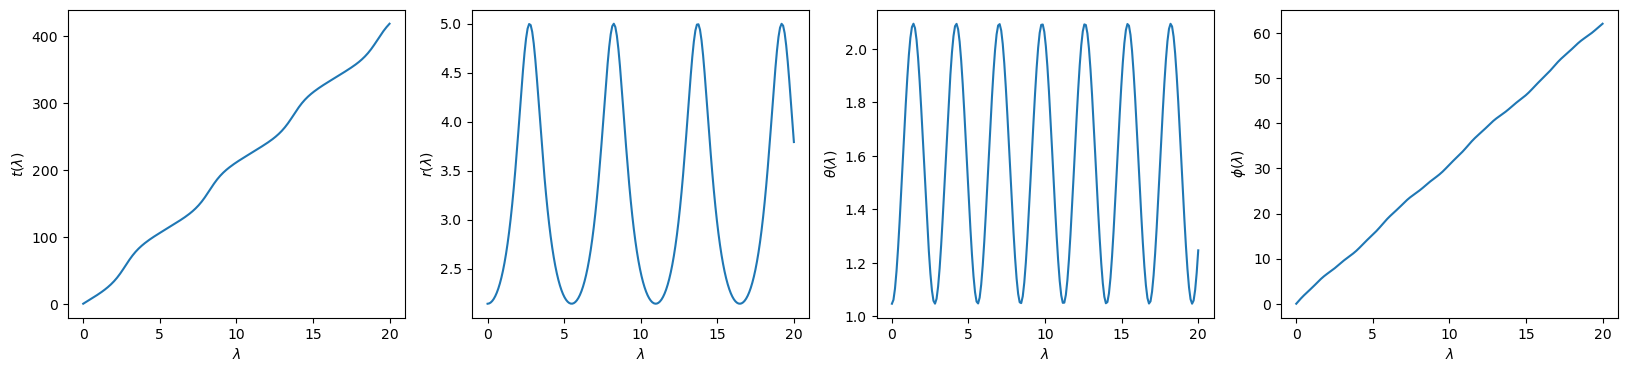

In [13]:
t, r, theta, phi = orbit.trajectory()

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")